This is formatting and aligning data from Copernicus EMS data: https://rapidmapping.emergency.copernicus.eu/

In [59]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import yaml
from rasterio.crs import CRS
import pandas as pd

In [60]:
yaml_file = '../events/benghazi_flood_2023.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'benghazi_flood_2023',
 'bounds': [20.01944791, 32.04374886, 20.20753099, 32.17949371],
 'event_date': '2023-11-09',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [80, 73],
 'mgrs_tiles': ['34SDA'],
 'dist_hls_confirmed_change_min_days': 30,
 'source_id': 'Copernicus EMSR696 AOI2',
 'links': ['https://rapidmapping.emergency.copernicus.eu/EMSR696/download',
  'https://apnews.com/article/libya-derna-floods-5d29f54b47bcc6daa6802e5f9c8f2d10']}

In [61]:
df_event = gpd.read_file('../external_validation_data/copernicus_ems/benghazi_flood_2023/EMSR696_AOI02_GRA_PRODUCT_observedEventA_v2.shp')
df_event.head()

,event_type,obj_desc,det_method,notation,dmg_src_id,area,geometry
0,5-Flood,Flash flood,Photo-interpretation,Flooded area,2,2.371920,"POLYGON ((20.04729 32.08037, 20.04738 32.08032..."
1,5-Flood,Flash flood,Photo-interpretation,Flooded area,2,2.203198,"POLYGON ((20.05000 32.08027, 20.04866 32.08021..."
2,5-Flood,Flash flood,Photo-interpretation,Flooded area,2,0.169475,"POLYGON ((20.05099 32.08109, 20.05082 32.08107..."
3,5-Flood,Flash flood,Photo-interpretation,Flooded area,2,1.378666,"POLYGON ((20.04591 32.07909, 20.04585 32.07903..."
4,5-Flood,Flash flood,Photo-interpretation,Flooded area,2,0.285406,"POLYGON ((20.04552 32.07770, 20.04538 32.07770..."


<Axes: >

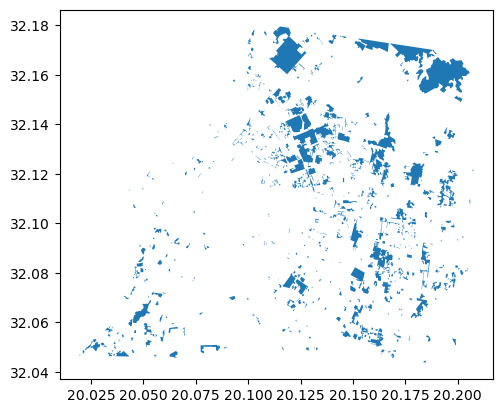

In [62]:
df_event.plot()

In [63]:
df_event.total_bounds

array([20.01944791, 32.04374886, 20.20753099, 32.17949371])

In [64]:
geo = df_event.geometry.unary_union

df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name']],
                               'date': [pd.to_datetime(event_dict['event_date'])],
                               'source_id': [f'Copernicus {event_dict["source_id"]}']},
                              geometry=[geo],
                              crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,benghazi_flood_2023,2023-11-09,Copernicus Copernicus EMSR696 AOI2,"MULTIPOLYGON (((20.05564 32.04632, 20.05553 32..."


In [65]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [66]:
df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')

# Extent

In [68]:
df_aoi = gpd.read_file('../external_validation_data/copernicus_ems/benghazi_flood_2023/EMSR696_AOI02_GRA_PRODUCT_areaOfInterestA_v2.shp')
df_aoi.head()

,emsr_id,glide_no,area_id,locality,map_type,geometry
0,EMSR696,FL-2023-000170-LBY,02,Benghazi,Grading,"POLYGON ((20.21051 32.16711, 20.20760 32.12241..."


<Axes: >

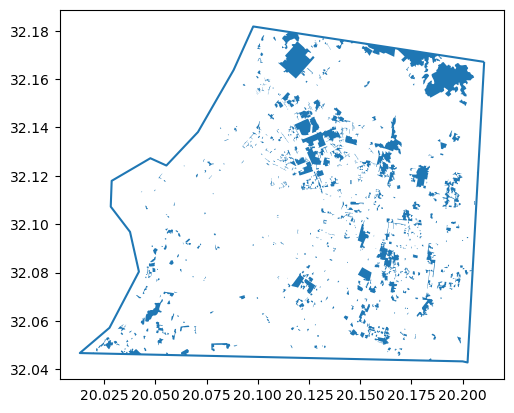

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_aoi.boundary.plot(ax=ax)
df_event.plot(ax=ax)

In [70]:
EXTERNAL_VAL_EXTENTS = Path('../external_validation_data_extents_db/')
EXTERNAL_VAL_EXTENTS.mkdir(exist_ok=True, parents=True)

df_aoi.to_file(EXTERNAL_VAL_EXTENTS / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')